In [51]:
import numpy as np
import matplotlib.pyplot as plt
from pygimli.physics import SIP
import pybert as pb

In [52]:
def compareTDFD(f=None, t=None, taus=None, **synthCC):
    # %% define Cole-Cole model
    synthCC.setdefault("rho", 1)
    t = t or np.logspace(-2, 0.6, 31)
    f = f or np.logspace(-2, 2, 41)
    taus = taus or np.logspace(-4, +3, 51)
    decay = pb.Decay(t=t)
    decay.v = decay.simulate(**synthCC)
    decay.invert()
    decay.decompose(error=0.01, tau=taus)
    rhoC = SIP.modelColeColeRho(f, **synthCC)
    spec = SIP.SIPSpectrum(f=f, amp=np.abs(rhoC), phi=-np.angle(rhoC))
    spec.fitColeCole()
    spec.fitDebyeModel(tau=taus, new=False)   
    fig, ax = plt.subplots()
    ax.semilogx(taus, decay.modelDD, "x-", label="TD")
    ax.semilogx(taus, spec.mDD, "+-", label="FD")
    ax.vlines(decay.logMeanTau(), *ax.get_ylim(), color="C0", ls="dashed")
    ax.vlines(spec.logMeanTau(), *ax.get_ylim(), color="C1", ls="dashed")
    ax.vlines(synthCC["tau"], *ax.get_ylim(), color="red", ls="dashed")
    ax.plot(decay.modelCC[1], 0, "x", color="C0")
    ax.plot(spec.mCC[1], 0, "x", color="C1")
    ax.set_xlabel(r"$\tau$ (s)")
    ax.set_title("Debye decomposition")
    ax.grid()
    ax.legend()
    print("Comparison of Cole-Cole parameters")
    print("synth FD  TD")
    keys = ["m", "tau", "c"]
    for i in range(-3, 0):
        key = keys[i]
        print(key+"\t{:.3f}\t{:.3f}\t{:.3f}".format(synthCC[key], decay.modelCC[i], spec.mCC[i]))
    print("Debye")
    print("logMeanTau=", decay.logMeanTau(), spec.logMeanTau())
    return decay, spec





Comparison of Cole-Cole parameters
synth FD  TD
m	0.600	0.600	0.600
tau	1.000	1.000	1.000
c	0.500	0.500	0.500
Debye
logMeanTau= 0.39901964461270034 1.2851093424917306


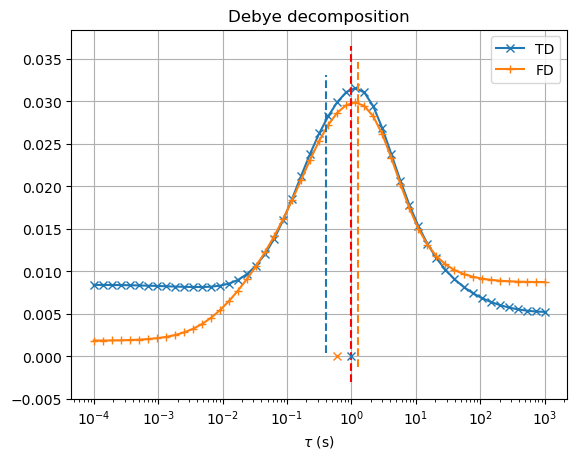

In [53]:
synthCC = dict(m=0.6, tau=1., c=0.5)
decay, spec = compareTDFD(**synthCC)

In [54]:
# decay.showAll(xScale="log", yScale="log");
# decay.modelCC
# spec.mCC

In [55]:
# spec.fitColeCole()
# spec.showAll()